In [1]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import torch
from cmehr.utils.file_utils import load_pkl
from cmehr.models.common.model_PANTHER import PANTHER, PrototypeTokenizer

In [2]:
file_path = "/home/fywang/Documents/EHR_codebase/MMMSPG/prototype_results/mimic4_pretrain/self_supervised_embs.pkl"
data_dict = load_pkl(file_path)

In [3]:
prototype_file = "/home/fywang/Documents/EHR_codebase/MMMSPG/prototype_results/mimic4_pretrain/ts_proto_16.pkl"
prototypes = load_pkl(prototype_file)
model = PANTHER(proto_path=prototype_file, out_size=16)

In [4]:
# prototypes["prototypes"]

In [5]:
data_dict.keys()

dict_keys(['train_ts_embs', 'train_cxr_embs'])

In [6]:
train_ts_emb = torch.from_numpy(data_dict["train_ts_embs"])
# test_ts_emb = torch.from_numpy(data_dict["test_ts_embs"])

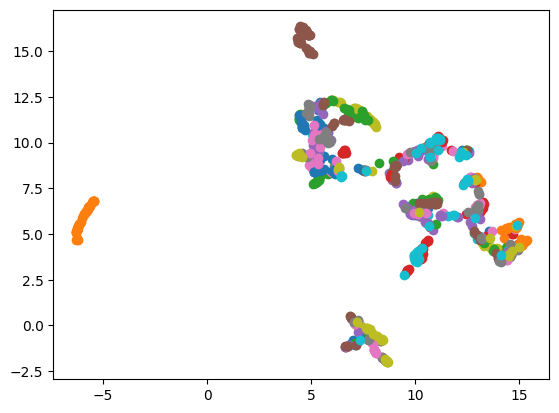

In [7]:
# visualize xxx
import umap
from einops import rearrange
sample_data = train_ts_emb[:20]
# flatten_data = sample_data.view(sample_data.size(0), -1).numpy()
flatten_data = rearrange(sample_data, 'b n c -> (b n) c').numpy()
reducer = umap.UMAP()
embedding = reducer.fit_transform(flatten_data)
sample_embedding = embedding.reshape(20, 48, 2)
for i in range(20):
    plt.scatter(sample_embedding[i, :, 0], sample_embedding[i, :, 1])

In [19]:
### get PANTHER representation and GMM mixtures
with torch.inference_mode():
    out_dict = model.representation(train_ts_emb[2].unsqueeze(dim=0))
    out = out_dict["repr"]
    qqs = out_dict["qq"]
    tokenizer = PrototypeTokenizer(p=16)
    mus, pis, sigmas = tokenizer.forward(out)
    mus = mus[0].detach().cpu().numpy()
    qq = qqs[0,:,:,0].cpu().numpy()
    global_cluster_labels = qq.argmax(axis=1)

In [20]:
mus

array([0.12153877, 0.07381621, 0.015625  , 0.02758197, 0.11924101,
       0.015625  , 0.04503528, 0.07774804, 0.06940476, 0.05212677,
       0.08414987, 0.06885209, 0.04479031, 0.08439794, 0.015625  ,
       0.08444203], dtype=float32)

<Axes: >

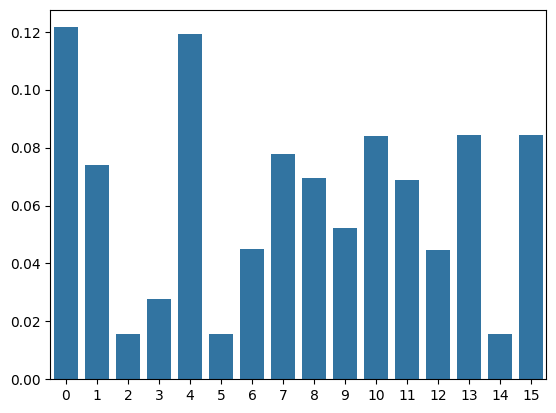

In [21]:
sns.barplot(mus)

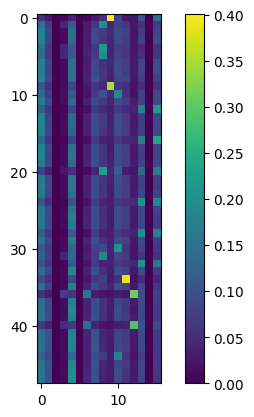

In [22]:
plt.imshow(qq)
plt.colorbar()